<a href="https://colab.research.google.com/github/SarankanT/MSCI-546-Final-Project/blob/main/Titanic_proposal_Baseline%26Improvements_MSCI546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages


In [91]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [92]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Survived', ylabel='count'>

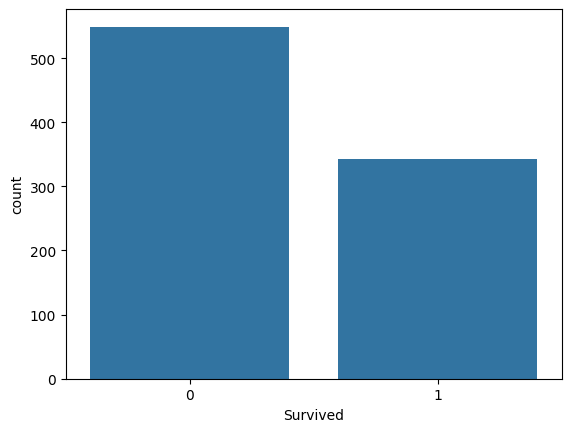

In [95]:
sns.countplot(x ='Survived', data = train_data)


In [96]:
train_data[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


## Establish Training data splits

For the training data, we chose to use an 80/20 split so that we could evaluate the different models, rather than using the entire training dataset and predicting on the test dataset. This choice was made since we did not have the survival data on the testing dataset.

In [68]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, # X - features
                                                    train_data.Survived, # y - target
                                                    test_size=0.2,
                                                    random_state = 42)

X_Testing = X_test
y_testing = y_test
len(y_testing)

179

## Model 1 - Decision Tree Classifier (Baseline)


In [69]:
#importing necessary libraries for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

a = DecisionTreeClassifier(min_samples_split=100)

features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(train_data[features])

# X_train, X_test, y_train, y_test = train_test_split(X, # X - features
#                                                     train_data.Survived, # y - target
#                                                     test_size=0.2,
#                                                     random_state = 42)

a.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100)

In [70]:
y_pred = a.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test,y_pred)
print("Accuracy using Decision Tree: ", accuracy*100 )

Accuracy using Decision Tree:  79.3296089385475


In [71]:
y_pred_train = a.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy using Decision Tree on training : ", accuracy_train * 100)

Accuracy using Decision Tree on training :  81.60112359550563


In [72]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8245614035087719
Recall: 0.6351351351351351


## Model 2 - Boosted Decision Tree

<ipython-input-73-4000cddbf5b7>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


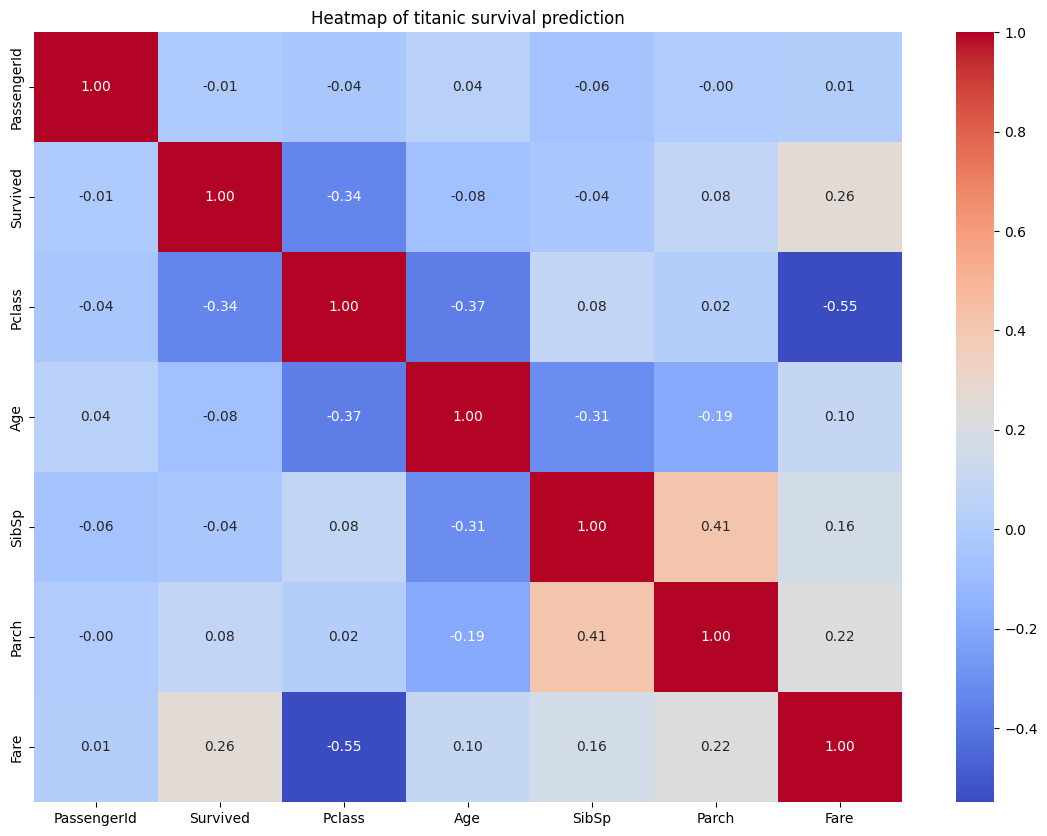

In [73]:
# creating a heat map to understand correlations better

#evaluating if any other features stand out that may help with prediction

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of titanic survival prediction')
plt.show()

The fare stand out as a factor not considered in the baseline and has high correlation with our target, but can also be considered redundant as it would correlate with passenger class, which itself is a proxy for the fare.

In [74]:
import xgboost as xgb
# import library for xgboost classifier

boost = xgb.XGBClassifier()

boost.fit(X_train, y_train) # fit model on training data

y_pred_boost = boost.predict(X_Testing)
# the same set of features will be used to predict our target of surv

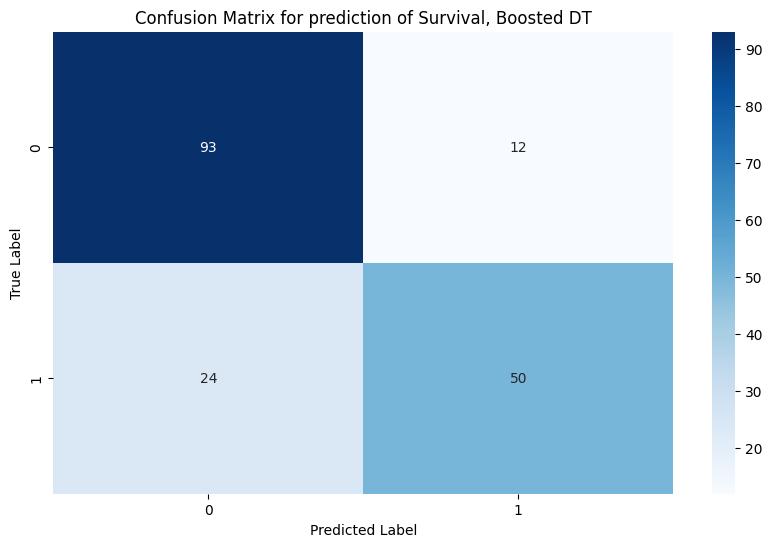

In [75]:
#confusion matrix for boosted decision tree
from sklearn import metrics

cm_boost = metrics.confusion_matrix(y_testing, y_pred_boost)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, Boosted DT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



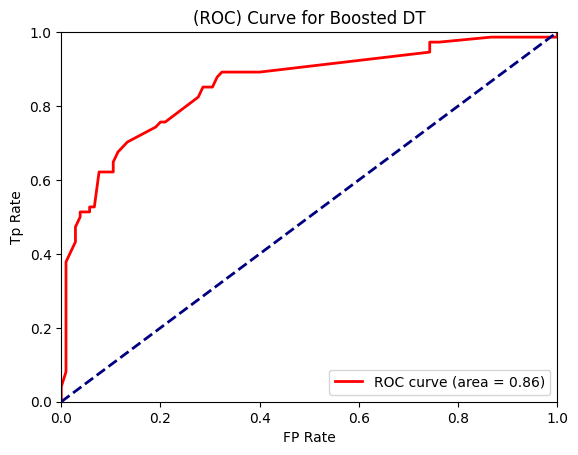

In [76]:
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve
precision_score, recall_score

y_pred_prob_boost = boost.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_boost)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()

In [77]:
#F1, Precision and Recall

F1 = f1_score(y_testing,y_pred_boost)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_boost)
recall = recall_score(y_testing,y_pred_boost)

print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7352941176470588
Precision: 0.8064516129032258
Recall: 0.6756756756756757


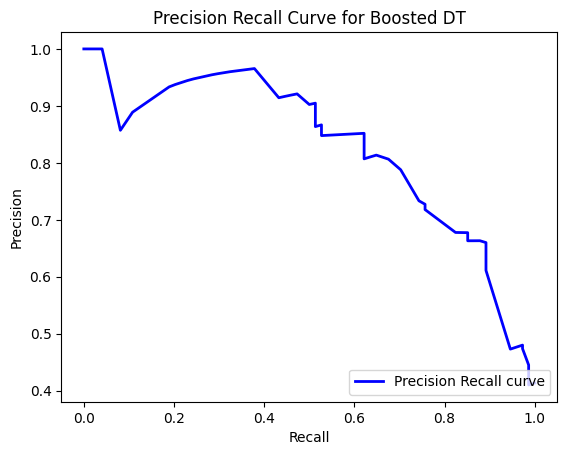

In [78]:
#p/r curve

# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_boost)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()


## Model 3 - Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_Testing)

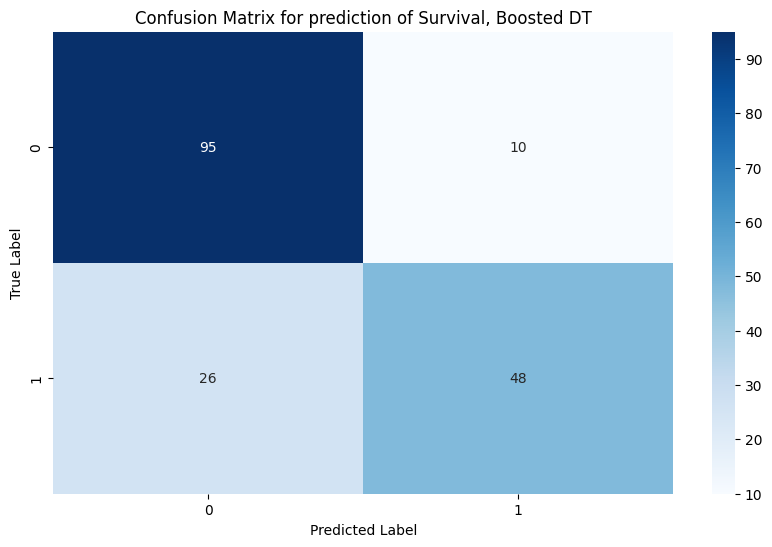

In [87]:
#confusion matrix for boosted decision tree
from sklearn import metrics

cm_boost = metrics.confusion_matrix(y_testing, y_pred_rf)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, Boosted DT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

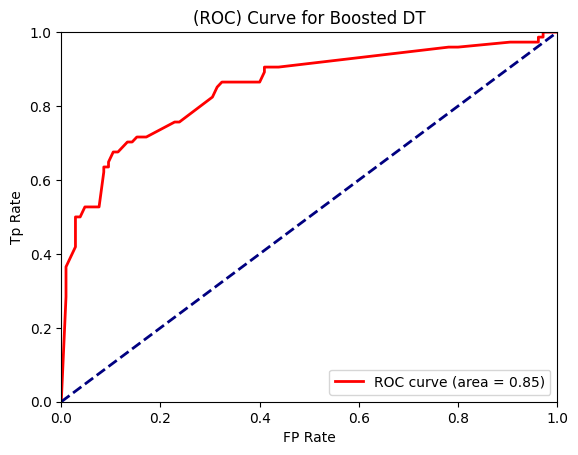

In [88]:
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve
precision_score, recall_score

y_pred_prob_rf = rf.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()

In [89]:
from sklearn.metrics import f1_score, precision_recall_curve
# accuracy
accuracy  = accuracy_score(y_testing, y_pred_rf)
print("Accuracy using Decision Tree: ", accuracy*100)

#F1, Precision and Recall

F1 = f1_score(y_testing,y_pred_rf)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_rf)
recall = recall_score(y_testing,y_pred_rf)

print("Precision:", precision)
print("Recall:", recall)

Accuracy using Decision Tree:  79.88826815642457
F1 Score: 0.7272727272727273
Precision: 0.8275862068965517
Recall: 0.6486486486486487


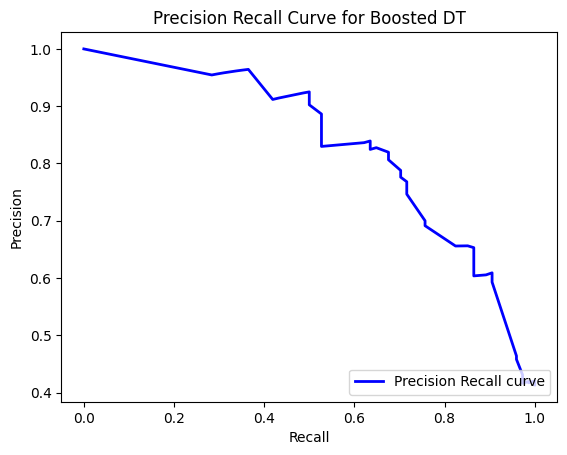

In [90]:
#p/r curve

# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_rf)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()

## Model 4 - k-Nearest Neighbour Classifier

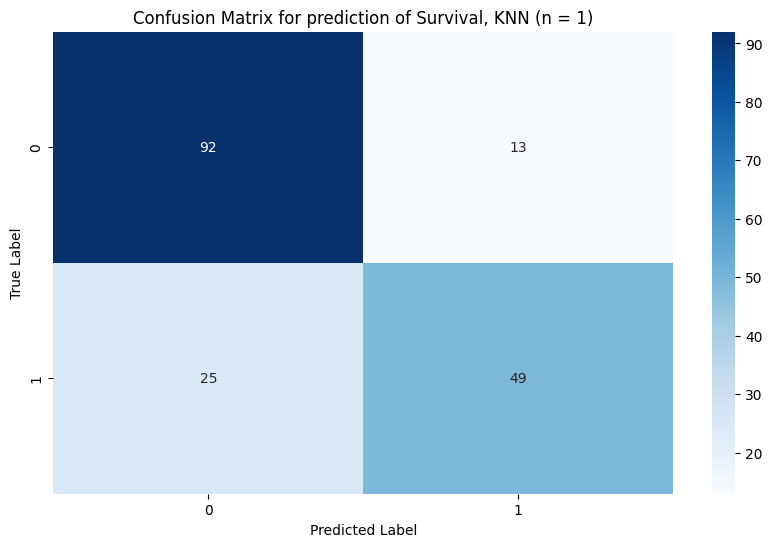

Accuracy: 0.7877094972067039
F1 Score: 0.7205882352941176
Precision: 0.7903225806451613
Recall: 0.6621621621621622


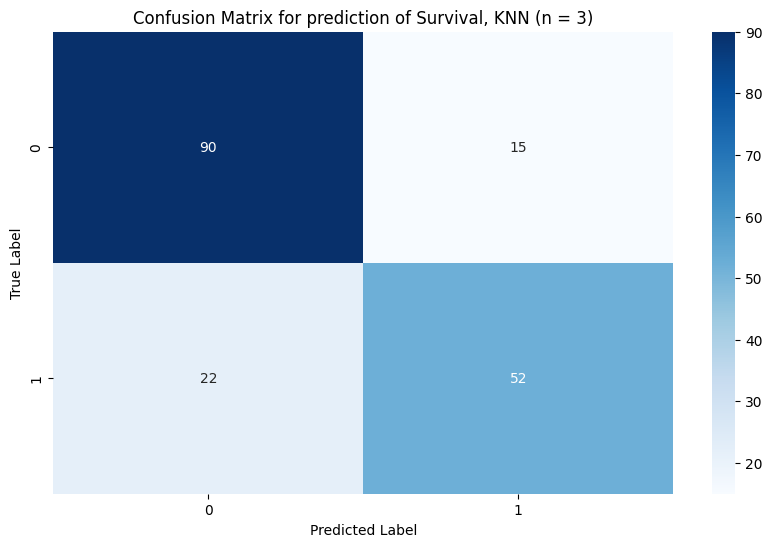

Accuracy: 0.7932960893854749
F1 Score: 0.7375886524822697
Precision: 0.7761194029850746
Recall: 0.7027027027027027


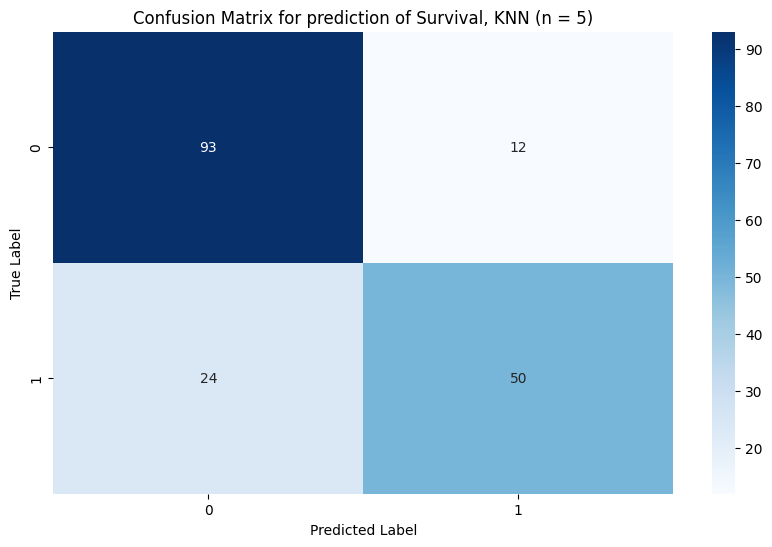

Accuracy: 0.7988826815642458
F1 Score: 0.7352941176470588
Precision: 0.8064516129032258
Recall: 0.6756756756756757


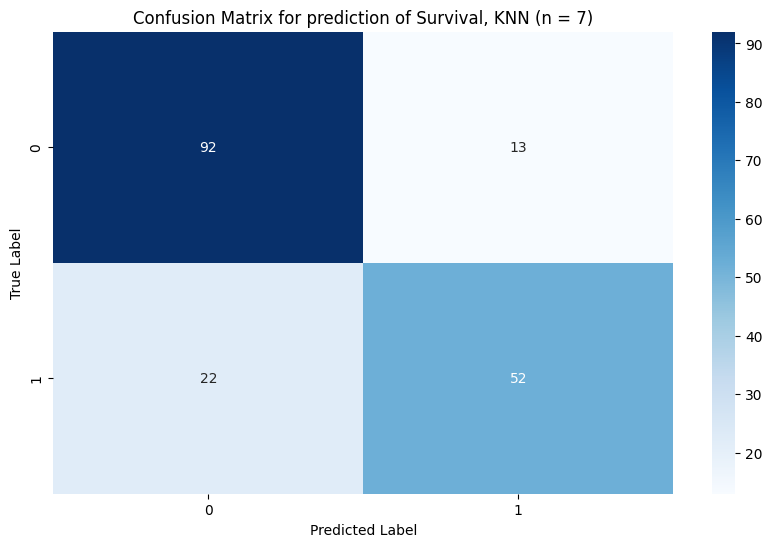

Accuracy: 0.8044692737430168
F1 Score: 0.7482014388489208
Precision: 0.8
Recall: 0.7027027027027027


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# start by preprocessing the data so values are more "normalized"
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_Testing)

k_experiments = [1, 3, 5, 7]
for k in k_experiments:
  # train KNN model
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  # make predictions
  y_pred_knn = knn.predict(X_test_scaled)

  # evaluate model
  knn_cm = metrics.confusion_matrix(y_testing, y_pred_knn)

  # plot confusion matrix
  plt.figure(figsize=(10, 6))
  sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for prediction of Survival, KNN (n = {k})')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  # compute metrics
  accuracy = accuracy_score(y_testing, y_pred_knn)
  print("Accuracy:", accuracy)
  F1 = f1_score(y_testing,y_pred_knn)
  print("F1 Score:", F1)
  precision = precision_score(y_testing,y_pred_knn)
  recall = recall_score(y_testing,y_pred_knn)
  print("Precision:", precision)
  print("Recall:", recall)

The metrics are nearly equal for k = 5 and k = 7, so 5 can be taken as a good number of nearest neighbours.

We can try another variation of the KNN model by training the model without normalizing the data. In theory, the normalization should have improved performance as it factors in differences in units between features.

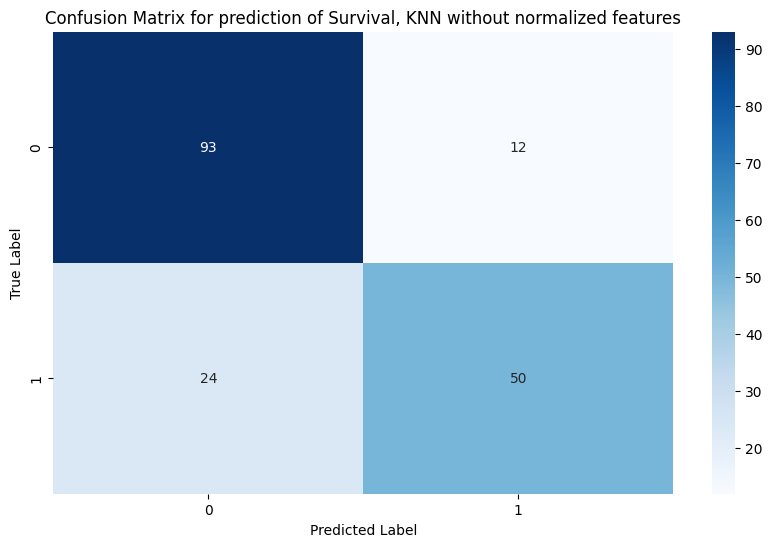

Accuracy: 0.7988826815642458
F1 Score: 0.7352941176470588
Precision: 0.8064516129032258
Recall: 0.6756756756756757


In [39]:
# train KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# make predictions
y_pred_knn = knn.predict(X_Testing)

# evaluate model
knn_cm = metrics.confusion_matrix(y_testing, y_pred_knn)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, KNN without normalized features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# compute metrics
accuracy = accuracy_score(y_testing, y_pred_knn)
print("Accuracy:", accuracy)

F1 = f1_score(y_testing,y_pred_knn)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_knn)
recall = recall_score(y_testing,y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)

The accuracy and F1 score are the same for this KNN model without normalization. Precision decreased by 2%, but this is balanced out by a 2% increase in recall. Overall, it seems that normalizing the features has a negligible effect on model performance for this dataset.

 Below is the ROC Curve and Precision-Recall Curve for the KNN model with k = 5.

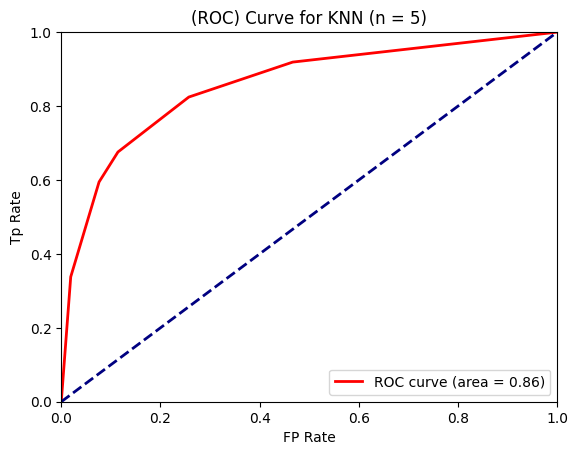

In [40]:
y_pred_prob_knn = knn.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for KNN (n = 5)')
plt.legend(loc="lower right")
plt.show()

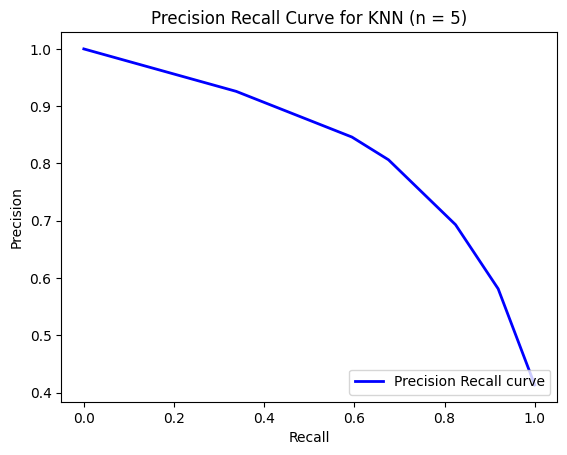

In [41]:
# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_knn)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for KNN (n = 5)')
plt.legend(loc="lower right")
plt.show()

## Model 5 - Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
# train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# predictions
y_pred_log_reg = log_reg.predict(X_Testing)

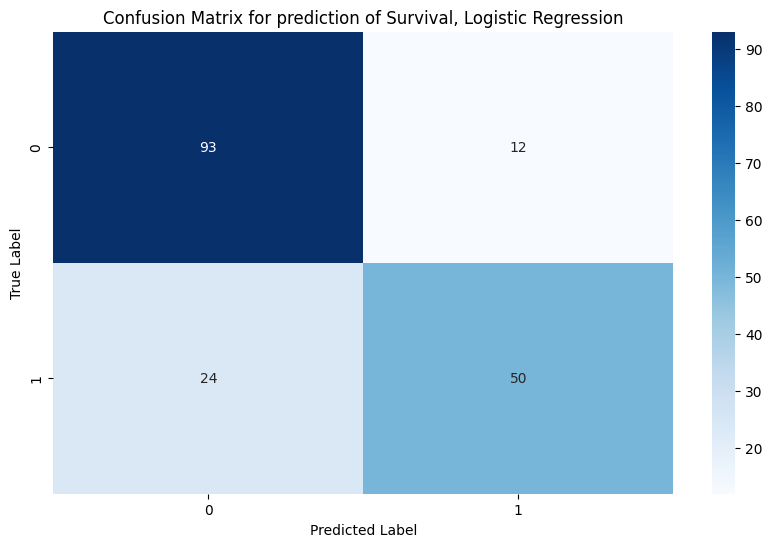

In [43]:
# evaluate model
log_reg_cm = metrics.confusion_matrix(y_testing, y_pred_knn)

# plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
# compute metrics
F1 = f1_score(y_testing,y_pred_knn)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_knn)
recall = recall_score(y_testing,y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7352941176470588
Precision: 0.8064516129032258
Recall: 0.6756756756756757


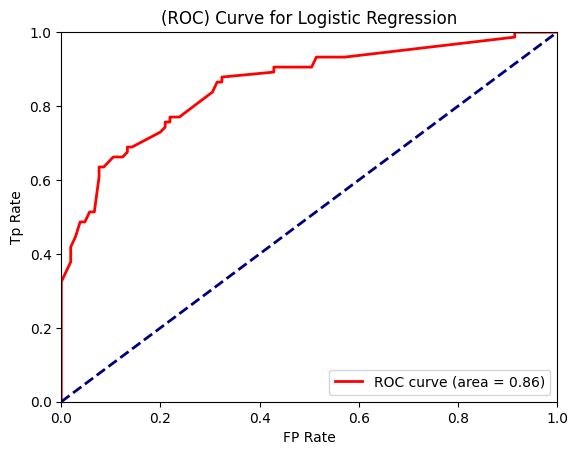

In [45]:
y_pred_prob_log_reg = log_reg.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_log_reg)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

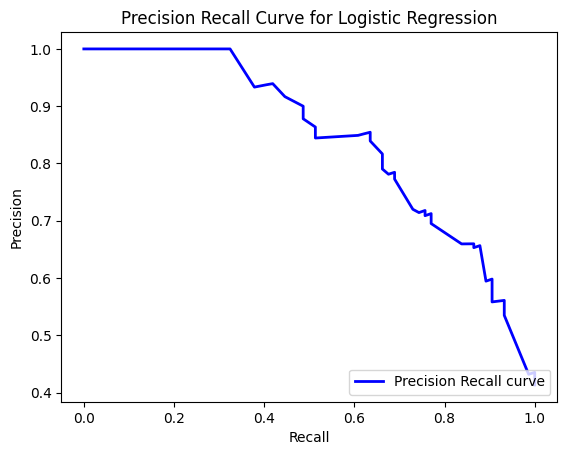

In [46]:
# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_log_reg)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Model 6 - Neural Network

In [47]:
# libraries needed
import torch
import torch.nn as nn
import torch.optim as optim

features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]

x_nn = pd.get_dummies(train_data[features])
y_nn = train_data.Survived

x_nn.head()
print(type(x_nn))
print(type(y_nn))

#convert to pytorch dtypes
x_nn = torch.tensor(x_nn.to_numpy(), dtype=torch.float32)
y_nn = torch.tensor(y_nn.to_numpy(), dtype=torch.float32).reshape(-1, 1)

#check if converted
print(type(x_nn))
print(type(y_nn))



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [48]:
#converting testting splits to pytorch type



#convert to pytorch dtypes
x_nn_test = torch.tensor(X_Testing.to_numpy(), dtype=torch.float32)
y_nn_test = torch.tensor(y_testing.to_numpy(), dtype=torch.float32).reshape(-1, 1)

#check if converted
print(type(x_nn_test))
print(type(y_nn_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [49]:
NeurN = nn.Sequential(
    nn.Linear(8, 12), # 5 input nodes to 10 nodes in the first hidden layer
    nn.ReLU(),        # ReLU activation for first hidden layer
    nn.Linear(12, 12), # 10 nodes from first hidden layer to 8 in the second
    nn.ReLU(),        # ReLU activation for second hidden layer
    nn.Linear(12, 1),  # 8 nodes from second hidden layer to 1 output node
    nn.Sigmoid()      # Sigmoid activation for output layer
)

print(NeurN) # Check the model

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=1, bias=True)
  (5): Sigmoid()
)


In [50]:
lossFn = nn.BCELoss()
optimizer = optim.Adam(NeurN.parameters(), lr = 0.001)


n_epochs = 100
batch_size = 13

for epoch in range(n_epochs):
    for i in range(0, len(x_nn), batch_size):
        Xbatch = x_nn[i:i+batch_size]
        y_pred = NeurN(Xbatch)
        ybatch = y_nn[i:i+batch_size]
        loss = lossFn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.6362424492835999
Finished epoch 1, latest loss 0.5304463505744934
Finished epoch 2, latest loss 0.5085918307304382
Finished epoch 3, latest loss 0.5225222110748291
Finished epoch 4, latest loss 0.5215582251548767
Finished epoch 5, latest loss 0.5088557600975037
Finished epoch 6, latest loss 0.4941427409648895
Finished epoch 7, latest loss 0.47917523980140686
Finished epoch 8, latest loss 0.46071726083755493
Finished epoch 9, latest loss 0.4419272243976593
Finished epoch 10, latest loss 0.42640846967697144
Finished epoch 11, latest loss 0.4126386344432831
Finished epoch 12, latest loss 0.40228185057640076
Finished epoch 13, latest loss 0.3917210102081299
Finished epoch 14, latest loss 0.384458065032959
Finished epoch 15, latest loss 0.37725701928138733
Finished epoch 16, latest loss 0.37026166915893555
Finished epoch 17, latest loss 0.36644625663757324
Finished epoch 18, latest loss 0.36281633377075195
Finished epoch 19, latest loss 0.3579372763633728
Fin

In [51]:
print(f'Shape of Xbatch: {Xbatch.shape}')
print(f'Shape of y_pred: {y_pred.shape}')

Shape of Xbatch: torch.Size([7, 8])
Shape of y_pred: torch.Size([7, 1])


In [52]:
print(f'Number of input features: {NeurN[0].in_features}')
print(f'Number of output features: {NeurN[0].out_features}')

Number of input features: 8
Number of output features: 12


In [53]:
with torch.no_grad(): # This prevents the model from calculating gradients when we don't need it to (optional)
  y_pred = NeurN(x_nn_test)

print(y_pred)

tensor([[0.4179],
        [0.1430],
        [0.1078],
        [0.8855],
        [0.6178],
        [0.9825],
        [0.7257],
        [0.1565],
        [0.7257],
        [0.9781],
        [0.3702],
        [0.1078],
        [0.2202],
        [0.1711],
        [0.1430],
        [0.9855],
        [0.3702],
        [0.7257],
        [0.1430],
        [0.3194],
        [0.1078],
        [0.3194],
        [0.3858],
        [0.1078],
        [0.1078],
        [0.1421],
        [0.3927],
        [0.1430],
        [0.1421],
        [0.4741],
        [0.1078],
        [0.4741],
        [0.3927],
        [0.4741],
        [0.1078],
        [0.2035],
        [0.3194],
        [0.7257],
        [0.9849],
        [0.1078],
        [0.2147],
        [0.1284],
        [0.1078],
        [0.0713],
        [0.7087],
        [0.3180],
        [0.1078],
        [0.1078],
        [0.1078],
        [0.3709],
        [0.5134],
        [0.9791],
        [0.1378],
        [0.7591],
        [0.0713],
        [0

In [54]:
y_pred = y_pred.round()

Text(0.5, 427.9555555555555, 'Predicted label')

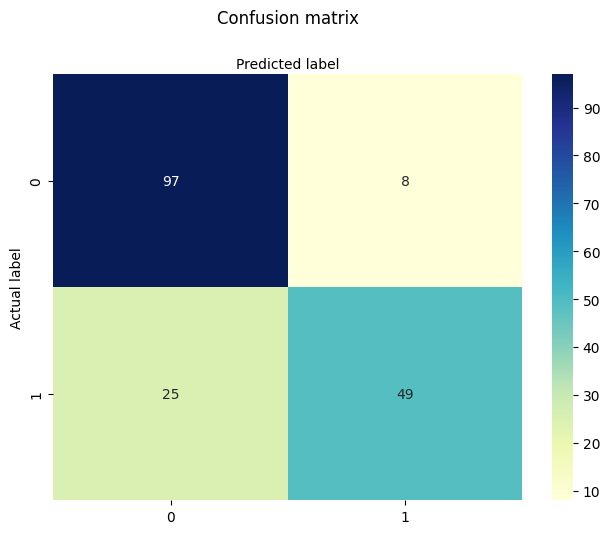

In [55]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_nn_test, y_pred)

class_names=[0,1] # Names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
# compute metrics
F1 = f1_score(y_testing,y_pred)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred)
recall = recall_score(y_testing,y_pred)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7480916030534351
Precision: 0.8596491228070176
Recall: 0.6621621621621622
